In [1]:
import numpy as np
import roadrunner
import pandas as pd
import matplotlib.pyplot as plt

SEED=1
np.random.seed(seed=SEED)

# Model system parameters
MODEL_SBML_FILE = "model_Michaelis_Menten.xml"
SPECIES = ["S", "E", "ES", "P"]
SPECIES_IDs = ["S1", "S2", "S3", "S4"] # how the species ids are saved in the SBML file from the original BNGL model
DURATION = 20000
PARAMS = ["log_k1", "log_k2", "log_k3"]

# Synthetic dataset parameters
NOISE = 0.01 # % Gaussian noise (range is 0-1)
N_PTS = 11

In [2]:
def gaussian_noise(x,std,mu=0):
    noise = np.random.normal(mu, std, size = x.shape)
    print(noise)
    x_noisy = x + noise
    return x_noisy

rr = roadrunner.RoadRunner(MODEL_SBML_FILE)
rr.integrator.absolute_tolerance = 5e-10
rr.integrator.relative_tolerance = 1e-8

rr.resetAll()
res = rr.simulate(0, DURATION, N_PTS)
# ignore the first timepoint (i.e. t=0)
ts_data = res[1:, 0]
prod_traj = res[1:, -1]

std = NOISE * prod_traj#np.std(prod_traj)
print("STD:", std)
noisy_data = gaussian_noise(prod_traj, std)
print(noisy_data)

STD: [1.07086991 2.11486628 3.11840912 4.05779095 4.88700324 5.51960799
 5.86184309 5.97103996 5.994584   5.99901241]
[  1.73946258  -1.29378301  -1.64705561  -4.35388236   4.22924989
 -12.70359139  10.22781278  -4.54519683   1.91250666  -1.49597598]
[108.82645405 210.19284535 310.19385646 401.42521255 492.92957392
 539.25720801 596.41212141 592.55879944 601.37090699 598.40526538]


Text(0, 0.5, '[Product]')

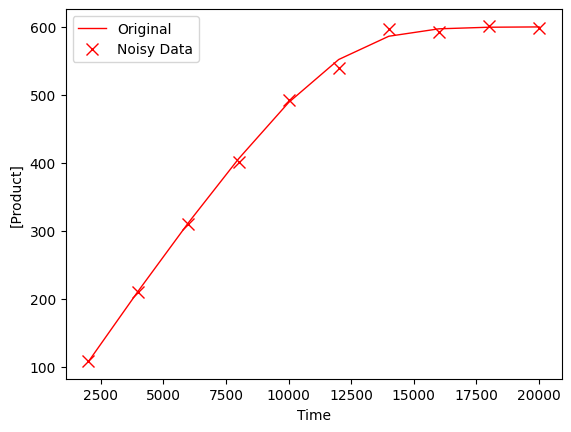

In [8]:
plt.figure(dpi=100)
plt.plot(ts_data, prod_traj, 'r-', lw=1, label="Original")
plt.plot(ts_data, noisy_data, 'rx', markersize=7, label="Noisy Data")
plt.legend()
plt.xlabel("Time")
plt.ylabel("[Product]")

In [5]:
sanity_df = pd.DataFrame(index=ts_data)
sanity_df["OG"] = prod_traj
sanity_df["noise"] = noisy_data
sanity_df.to_csv("sanity_check.csv")

In [ ]:
N_DATA = len(ts_data)
# Save for later
df = pd.DataFrame()

df["observableId"] = ["product"] * N_DATA
df["simulationConditionId"] = ["simCondition"] * N_DATA
df["measurement"] = noisy_data
df["time"] = ts_data
#df["noiseParameters"] = [0] * N_DATA
df.to_csv("measurementData_Michaelis_Menten.tsv", sep="\t", index=False)
df

In [ ]:
!petablint -h

In [ ]:
!petablint -y ./Michaelis_Menten.yaml